In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
loan=pd.read_csv("loan_dataset.csv")
loan.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies
0,10000.0,19.53,52000.0,15.00,0.0,1.0,4.0,2.0,35.9,0.00,0.0,0.0,0.0,622.0,15886.0,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,1623.000000,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0
1,35000.0,20.75,85000.0,24.98,0.0,1.0,9.0,0.0,46.6,0.00,0.0,0.0,0.0,0.0,161643.0,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,4833.000000,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0
2,20000.0,9.16,77000.0,13.75,0.0,1.0,14.0,0.0,13.9,13700.41,0.0,0.0,0.0,0.0,25031.0,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,21491.000000,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0
3,17475.0,11.47,41682.0,30.06,0.0,0.0,10.0,0.0,27.6,12189.23,0.0,0.0,0.0,0.0,118388.0,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,17072.000000,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0
4,8000.0,9.16,72000.0,22.63,0.0,0.0,4.0,0.0,98.7,3373.45,0.0,0.0,0.0,0.0,59568.0,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,10857.383932,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0


In [3]:
loan.dtypes

loan_amnt                     float64
int_rate                      float64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_util                    float64
out_prncp                     float64
total_rec_late_fee            float64
recoveries                    float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
open_acc_6m                   float64
open_act_il                   float64
open_il_24m                   float64
mths_since_rcnt_il            float64
total_bal_il                  float64
il_util                       float64
open_rv_24m                   float64
all_util                      float64
inq_fi                        float64
total_cu_tl                   float64
inq_last_12m                  float64
bc_open_to_b

In [4]:
loan.shape

(133889, 39)

In [5]:
loan.isnull().sum()

loan_amnt                     0
int_rate                      0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
collections_12_mths_ex_med    0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_24m                   0
mths_since_rcnt_il            0
total_bal_il                  0
il_util                       0
open_rv_24m                   0
all_util                      0
inq_fi                        0
total_cu_tl                   0
inq_last_12m                  0
bc_open_to_buy                0
bc_util                       0
chargeoff_within_12_mths      0
delinq_amnt                   0
mort_acc                      0
mths_sin

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_feat=ss.fit_transform(loan)

In [7]:
loan_ss=pd.DataFrame(scaled_feat,columns=loan.columns)
loan_ss.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies
0,-0.630992,1.460681,-0.364531,-0.456246,-0.37804,0.481814,-1.409115,2.650312,-0.662302,-0.769559,-0.133718,-0.181158,-0.127946,0.176770,-0.805123,0.791444,-0.603723,2.019464,-0.731878,-0.495642,1.289731,-1.114389,1.371397,1.365832,-0.553606,-0.075437,-0.587345,-7.124747e-01,-0.087446,-0.023319,-0.862198,-0.468646,1.108583,-0.755026,-0.227260,-0.029255,-0.178747,-1.229459,-0.340111
1,2.191283,1.713318,0.058092,0.545140,-0.37804,0.481814,-0.541425,-0.359192,-0.220191,-0.769559,-0.133718,-0.181158,-0.127946,-0.126331,0.088283,-0.866677,0.068145,0.822668,-0.284729,0.905144,0.548073,-0.734052,0.518834,2.699962,-0.194909,-0.075437,-0.383176,2.883228e-01,-0.087446,-0.023319,-0.346337,-0.290166,-0.388390,-0.337764,0.039590,-0.029255,-0.178747,0.678429,-0.340111
2,0.497918,-0.686729,-0.044362,-0.581670,-0.37804,0.481814,0.326265,-0.359192,-1.571315,1.551762,-0.133718,-0.181158,-0.127946,-0.126331,-0.749070,-0.866677,1.747815,-0.972525,0.907670,-0.352892,-1.537842,0.026621,-1.537346,0.031702,-0.553606,-0.075437,0.676342,-2.014587e+00,-0.087446,-0.023319,-0.862198,-0.647125,-0.388390,-0.755026,0.039590,-0.029255,-0.178747,0.678429,-0.340111
3,0.212868,-0.208376,-0.496670,1.054864,-0.37804,-0.655876,-0.367887,-0.359192,-1.005248,1.295716,-0.133718,-0.181158,-0.127946,-0.126331,-0.176845,-0.866677,-0.939657,-0.972525,0.572307,-0.846918,0.130890,-0.734052,-1.637647,-0.635363,-0.553606,-0.885856,0.395275,-1.411957e+00,-0.087446,-0.023319,-0.346337,-0.290166,-0.388390,0.496760,-0.627535,-0.029255,-0.178747,0.678429,-0.340111
4,-0.856775,-0.686729,-0.108396,0.309343,-0.37804,-0.655876,-1.409115,-0.359192,1.932518,-0.197980,-0.133718,-0.181158,-0.127946,-0.126331,-0.537378,-0.866677,0.068145,0.822668,-0.471041,0.097938,0.177243,-1.114389,1.020342,0.698767,1.598571,-0.480647,0.000000,2.548779e-16,-0.087446,-0.023319,-0.862198,0.423753,-0.388390,-1.589550,-0.093835,-0.029255,-0.178747,0.678429,-0.340111


# K Means Clustering

In [8]:
cluster_range=range(1,11)
cluster_errors=[]

for k in cluster_range:
    cluster=KMeans(k,n_init=15,random_state=1)
    cluster.fit(loan_ss)
    labels=cluster.labels_
    centroids=cluster.cluster_centers_
    cluster_errors.append(cluster.inertia_) #wcss is the inertia
cluster_df=pd.DataFrame({"num_cluster":cluster_range,"cluster_error":cluster_errors})
cluster_df

,num_cluster,cluster_error
0,1,5.221671e+06
1,2,4.858254e+06
2,3,4.640955e+06
3,4,4.490770e+06
4,5,4.342123e+06
5,6,4.236907e+06
6,7,4.091197e+06
7,8,3.991819e+06
8,9,3.918579e+06
9,10,3.824911e+06


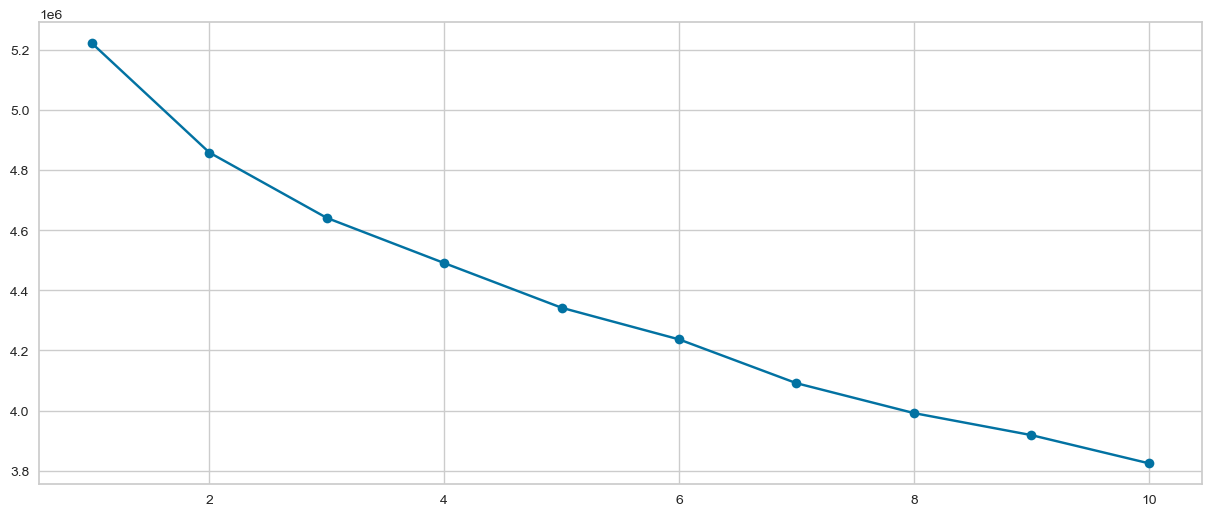

In [9]:
plt.figure(figsize=(15,6))
plt.plot(cluster_df.num_cluster,cluster_df.cluster_error,marker="o");

In [10]:
from kneed.knee_locator import KneeLocator

k = KneeLocator(x  = range(1,11), y = cluster_errors, curve = 'convex', direction = 'decreasing')

k.elbow

3

The python in-built elbow locator function returns K = 3 as the optimal value for the number of clusters.

Silhoutte Score

In [11]:
n_clusters=[3,4,5,6,7]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=5)
    predict=cluster.fit_predict(loan_ss)
    score=silhouette_score(loan_ss,predict,random_state=5)
    print("For {} clusters the silhouette is {}".format(k,score))

For 3 clusters the silhouette is 0.05485864995072453
For 4 clusters the silhouette is 0.055083767015925725
For 5 clusters the silhouette is 0.0544407078175469
For 6 clusters the silhouette is 0.05792580857521986
For 7 clusters the silhouette is 0.055718071813897777


Not able to conclude , Lets try PowerTransformation and than try to get the optimal K

In [12]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
feature_pt=pt.fit_transform(loan_ss)
loan_pt=pd.DataFrame(feature_pt,columns=loan_ss.columns)

In [13]:
cluster_range=range(1,11)
cluster_errors=[]

for k in cluster_range:
    cluster=KMeans(k,n_init=15,random_state=1)
    cluster.fit(loan_pt)
    labels=cluster.labels_
    centroids=cluster.cluster_centers_
    cluster_errors.append(cluster.inertia_) #wcss is the inertia
cluster_df=pd.DataFrame({"num_cluster":cluster_range,"cluster_error":cluster_errors})
cluster_df

,num_cluster,cluster_error
0,1,5.221671e+06
1,2,4.762216e+06
2,3,4.559452e+06
3,4,4.383644e+06
4,5,4.219646e+06
5,6,4.082276e+06
6,7,3.965930e+06
7,8,3.845773e+06
8,9,3.762121e+06
9,10,3.644801e+06


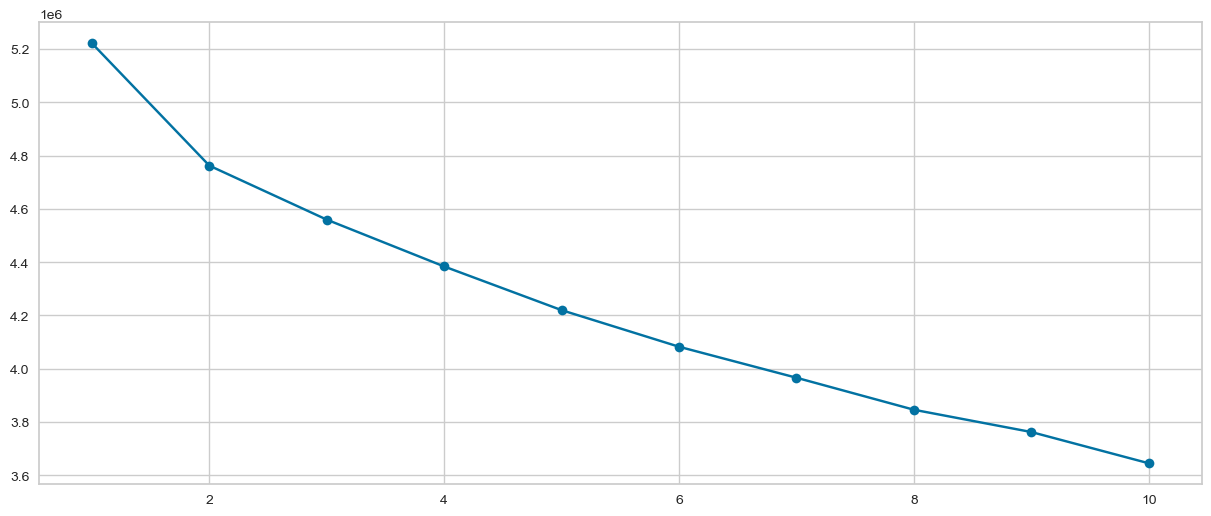

In [14]:
plt.figure(figsize=(15,6))
plt.plot(cluster_df.num_cluster,cluster_df.cluster_error,marker="o");

Since the elbow point is not clearly visible, we can also use the KneeLocator() from the 'kneed' library in python. This function returns the point of maximum curvature (i.e. elbow/knee point).

In [15]:
from kneed.knee_locator import KneeLocator

k = KneeLocator(x  = range(1,11), y = cluster_errors, curve = 'convex', direction = 'decreasing')

k.elbow

4

The python in-built elbow locator function returns K = 4 as the optimal value for the number of clusters.

In [16]:
n_clusters=[4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=5)
    predict=cluster.fit_predict(loan_pt)
    score=silhouette_score(loan_pt,predict,random_state=5)
    print("For {} clusters the silhouette is {}".format(k,score))

For 4 clusters the silhouette is 0.07598322670552991
For 5 clusters the silhouette is 0.06801708311651031
For 6 clusters the silhouette is 0.061596833924926216
For 7 clusters the silhouette is 0.06364234947875412
For 8 clusters the silhouette is 0.0692309050932967


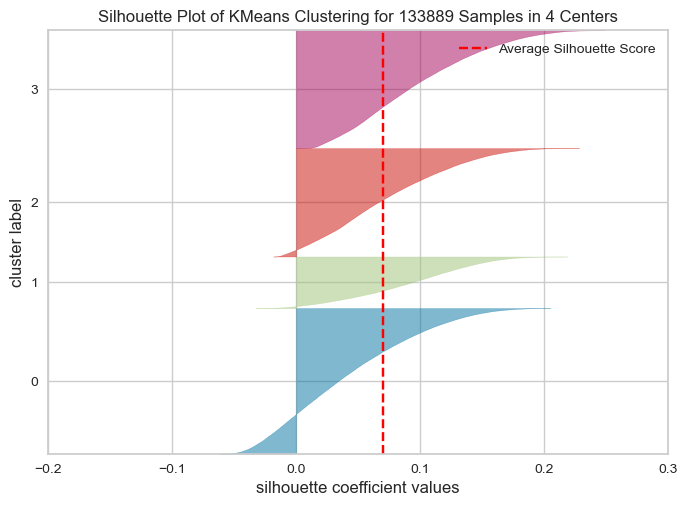

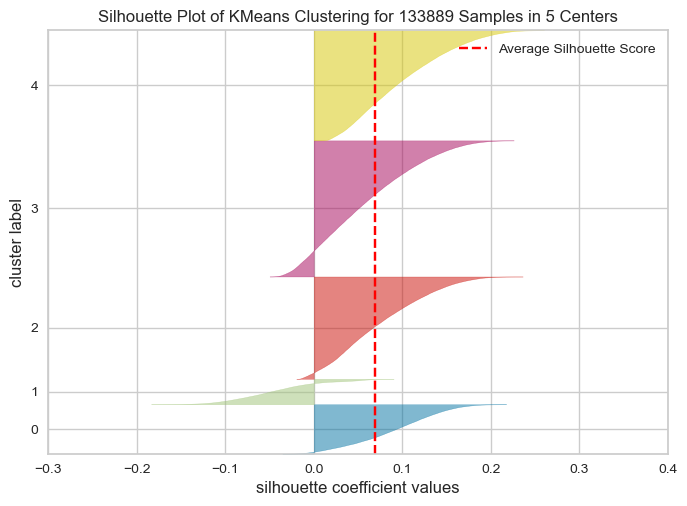

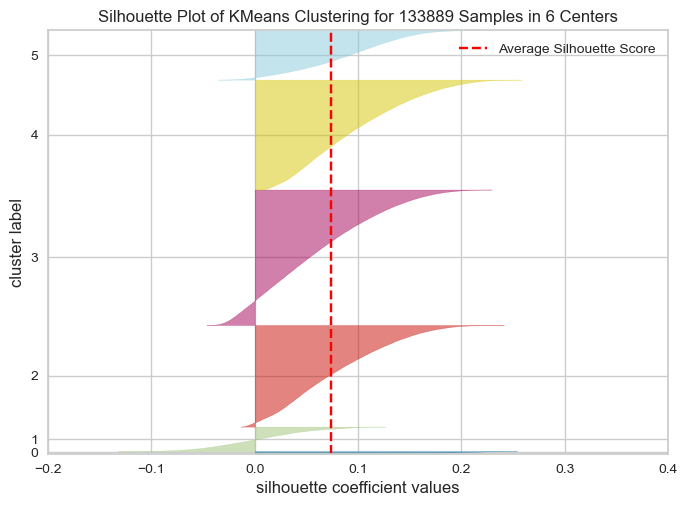

In [17]:
for i in range(4,7):
    kms=KMeans(n_clusters=i)
    kms.fit(loan_pt)
    model=KMeans(n_clusters=i,random_state=40)
    visualizer=SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(loan_pt)
    visualizer.show()

From the elbow plot and silhouette score method, we can consider the optimal number of clusters as 4.

Now let us group the dataset into 4 clusters.

# Build the model

In [18]:
K_model=KMeans(n_clusters=4,random_state=1).fit(loan_pt)

In [19]:
loan["K_labels"]=K_model.labels_
loan.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels
0,10000.0,19.53,52000.0,15.00,0.0,1.0,4.0,2.0,35.9,0.00,0.0,0.0,0.0,622.0,15886.0,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,1623.000000,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,3
1,35000.0,20.75,85000.0,24.98,0.0,1.0,9.0,0.0,46.6,0.00,0.0,0.0,0.0,0.0,161643.0,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,4833.000000,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,3
2,20000.0,9.16,77000.0,13.75,0.0,1.0,14.0,0.0,13.9,13700.41,0.0,0.0,0.0,0.0,25031.0,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,21491.000000,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,1
3,17475.0,11.47,41682.0,30.06,0.0,0.0,10.0,0.0,27.6,12189.23,0.0,0.0,0.0,0.0,118388.0,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,17072.000000,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,1
4,8000.0,9.16,72000.0,22.63,0.0,0.0,4.0,0.0,98.7,3373.45,0.0,0.0,0.0,0.0,59568.0,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,10857.383932,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,2


The new column of cluster label added to the dataframe that indicates the cluster number for each observation

# Check the size of each cluster

In [20]:
np.unique(K_model.labels_, return_counts=True)   

(array([0, 1, 2, 3]), array([ 8103, 36915, 39871, 49000], dtype=int64))

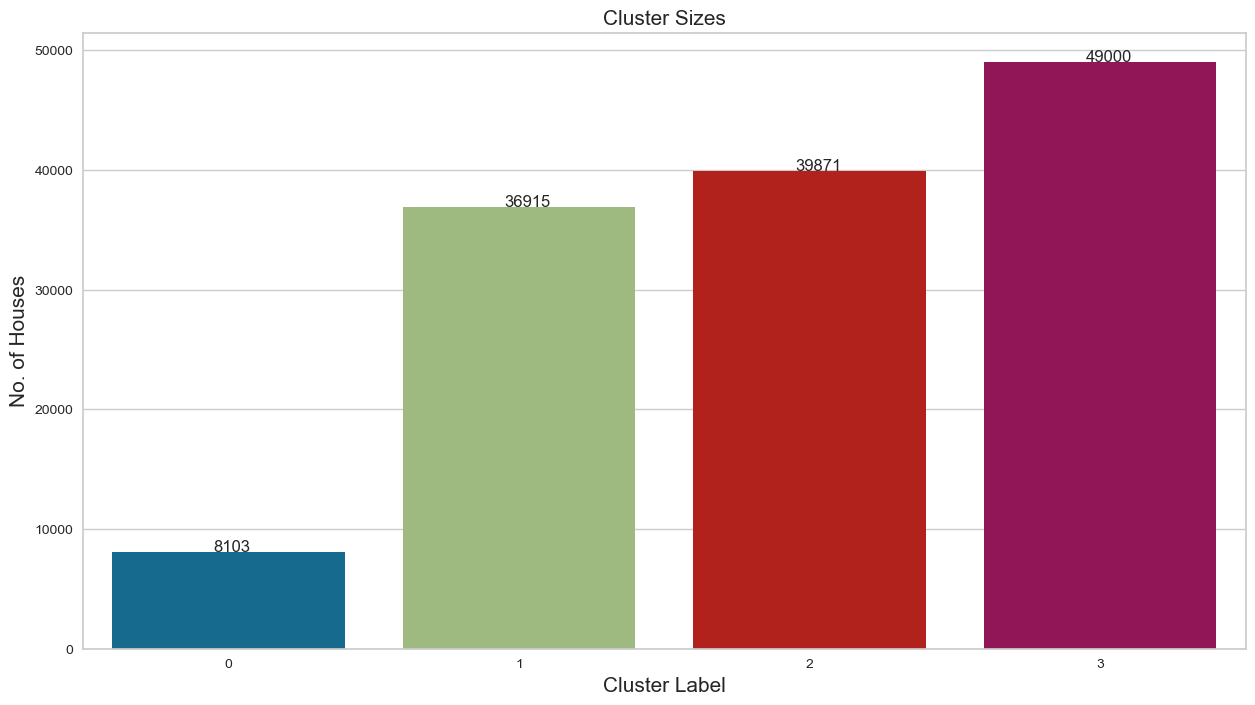

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(data= loan, x = 'K_labels')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Cluster Label', fontsize = 15)
plt.ylabel('No. of Houses', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y = np.unique(K_model.labels_, return_counts=True)[1][0] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][0])

plt.text(x = 0.95, y = np.unique(K_model.labels_, return_counts=True)[1][1] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][1])

plt.text(x = 1.95, y = np.unique(K_model.labels_, return_counts=True)[1][2] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][2])

plt.text(x = 2.95, y = np.unique(K_model.labels_, return_counts=True)[1][3] + 50, 
         s = np.unique(K_model.labels_, return_counts=True)[1][3])
# display the plot
plt.show()

# Cluster centers

In [22]:
np.min(loan["loan_amnt"])

1000.0

In [23]:
centers = pd.DataFrame(K_model.cluster_centers_, columns =  (loan.drop('K_labels', axis=1)).columns)      

# display the cluster centers
centers

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies
0,-0.079901,0.150509,0.123651,-0.066884,1.925725,0.165623,0.031186,-0.037506,-0.028003,-0.038040,0.077299,0.045926,0.729335,0.119057,0.069787,0.053378,0.136675,-0.054005,-0.004475,0.127095,0.056942,-0.096994,0.060829,0.065206,0.006260,0.138225,-0.252155,-0.034676,1.412023,0.346702,0.169315,-0.136411,1.294364,-0.151367,0.226549,0.461048,3.853856,-1.060262,-0.104700
1,-0.113709,-0.567346,-0.130931,-0.526035,-0.150959,-0.087879,-0.093783,-0.011599,-0.816258,-0.047178,-0.082442,-0.118411,-0.030731,0.023428,-0.273239,-0.097884,-0.591418,-0.532221,0.476358,-0.635212,-0.347355,0.128447,-0.969458,-0.261861,-0.213322,-0.208308,0.776109,-0.842720,-0.090632,0.000437,-0.061327,0.085997,-0.155862,0.027408,-0.537250,-0.029700,-0.247438,0.156471,-0.008282
2,-0.076137,0.115129,-0.264462,0.011512,-0.155487,-0.404743,-0.553998,-0.118378,0.803528,0.091966,-0.000994,-0.032313,-0.080062,-0.127842,-0.260847,-0.537326,-0.291005,-0.422752,0.397004,-0.354305,-0.171619,-0.466677,0.495400,-0.343876,-0.167108,-0.526939,-0.695778,0.813722,-0.091788,-0.048443,-0.225358,0.399814,-0.159778,-0.153132,-0.349511,-0.029700,-0.248233,0.066500,-0.109108
3,0.160933,0.309041,0.293588,0.398237,-0.078175,0.368417,0.516643,0.111340,-0.034331,-0.033027,0.050169,0.107976,-0.032299,0.066741,0.406832,0.502487,0.660179,0.754378,-0.681625,0.746321,0.392174,0.299220,0.317361,0.466621,0.295846,0.563234,0.023207,-0.021579,-0.090535,-0.018240,0.201722,-0.367818,0.033464,0.129071,0.652117,-0.029700,-0.248905,0.003301,0.112408


Unscaled_centers

In [24]:
unscaled_centers = pd.DataFrame(ss.inverse_transform(K_model.cluster_centers_), 
                                columns =  (loan.drop('K_labels', axis=1)).columns)      

# display the dataframe
unscaled_centers

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies
0,14881.622958,13.203084,90119.087684,18.880457,2.093135,0.722076,12.299627,0.213780,51.251339,4317.418580,2.150466,135.543832,0.142425,503.565010,158625.455791,1.109757,3.203999,1.534965,21.521078,41062.205783,72.404708,2.674985,61.867416,1.050226,1.560834,2.527290,6892.945539,58.795518,0.173536,338.674840,1.999595,5.861472,2.248209,3.446714,10.401227,0.015271,2.044252,84.781004,0.090309
1,14582.150563,9.736508,70240.390428,14.304466,0.206319,0.499255,11.579503,0.230997,32.173950,4263.481555,0.522545,37.453201,0.016151,307.324421,102661.620661,0.927306,1.036630,0.735805,34.425039,8925.026037,63.682691,3.267725,41.323613,0.559919,0.948667,1.672093,23059.561963,36.269042,-0.000369,21.743013,1.552494,7.107594,0.310663,3.875163,4.676673,-0.000014,-0.034822,95.431229,0.127296
2,14914.964913,13.032232,59813.750494,19.661766,0.202205,0.220740,8.927551,0.160036,71.376111,5084.710399,1.352586,88.843888,0.007955,-3.100058,104683.368704,0.397259,1.930892,0.918741,32.295432,20767.456795,67.473890,1.702996,70.532725,0.436970,1.077506,0.885758,-81.813514,82.446955,-0.000502,-22.996199,1.234519,8.865874,0.305432,3.442484,6.083742,-0.000014,-0.035224,94.643702,0.088618
3,17014.950941,13.968646,103388.471752,23.515933,0.272449,0.900327,15.097037,0.312698,51.098204,4347.002367,1.873982,172.580807,0.015890,396.206212,213613.515837,1.651465,4.762351,2.885878,3.348623,67167.382159,79.636760,3.716729,66.982647,1.651990,2.368166,3.576153,11222.243806,59.160637,-0.000357,4.648304,2.062417,4.564927,0.563609,4.118804,13.590796,-0.000014,-0.035565,94.090510,0.173596


Here, we have the center of all the cluster

# Analyze the Clusters

In [25]:
loan[loan["K_labels"]==0].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels
count,8103.000000,8103.000000,8.103000e+03,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8.103000e+03,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.000000,8103.0
mean,14912.661977,13.062898,8.429244e+04,18.886631,2.150315,0.739109,12.168703,0.232753,51.250158,4265.516585,2.027865,122.954538,0.137850,344.637048,1.560745e+05,1.117869,3.083499,1.531933,22.251871,40226.930679,72.004319,2.716754,61.763459,1.077502,1.558805,2.476243,7275.684685,58.827274,0.160311,317.340738,1.971615,5.934962,1.936196,3.475873,10.099223,0.015056,1.492287,84.702777,0.091818,0.0
std,8748.742360,4.529604,5.737903e+04,9.137910,1.927625,1.007775,5.444548,0.705886,24.299661,5673.696154,14.339983,590.232134,0.442584,2057.027584,1.720553e+05,1.256748,3.064689,1.601461,27.656896,45602.224788,23.739850,2.570769,20.961974,1.669100,2.805154,2.615799,10421.835921,27.880478,0.435802,3693.976930,2.050627,5.389251,2.333892,2.255880,7.972291,0.125772,1.466034,11.758814,0.325363,0.0
min,1000.000000,5.320000,7.200000e+03,0.220000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.700000,0.000000,0.0
25%,8000.000000,9.750000,5.207150e+04,12.140000,1.000000,0.000000,8.000000,0.000000,32.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.666350e+04,0.000000,1.000000,0.000000,6.000000,12298.500000,60.000000,1.000000,48.000000,0.000000,0.000000,1.000000,1325.500000,37.900000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,0.000000,1.000000,78.900000,0.000000,0.0
50%,13025.000000,11.990000,7.250000e+04,17.890000,1.000000,0.000000,11.000000,0.000000,50.700000,2005.730000,0.000000,0.000000,0.000000,0.000000,9.897700e+04,1.000000,2.000000,1.000000,13.000000,27200.000000,74.000000,2.000000,63.000000,0.000000,0.000000,2.000000,3734.000000,61.000000,0.000000,0.000000,2.000000,5.000000,1.000000,3.000000,8.000000,0.000000,1.000000,87.500000,0.000000,0.0
75%,20000.000000,15.310000,1.000000e+05,25.065000,3.000000,1.000000,15.000000,0.000000,70.000000,6948.435000,0.000000,0.000000,0.000000,0.000000,2.290505e+05,2.000000,4.000000,2.000000,26.000000,51993.000000,87.000000,4.000000,76.000000,2.000000,2.000000,4.000000,8848.000000,82.800000,0.000000,0.000000,3.000000,8.000000,2.000000,5.000000,13.000000,0.000000,1.000000,93.500000,0.000000,0.0
max,40000.000000,28.990000,1.950000e+06,119.270000,22.000000,5.000000,52.000000,22.000000,128.000000,29887.020000,609.810000,12692.130000,12.000000,65588.000000,5.445012e+06,14.000000,48.000000,14.000000,337.000000,566851.000000,291.000000,30.000000,198.000000,24.000000,31.000000,29.000000,124415.000000,124.500000,7.000000,112524.000000,25.000000,24.000000,38.000000,24.000000,110.000000,2.000000,22.000000,100.000000,6.000000,0.0


In [26]:
loan[loan["K_labels"]==1].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels
count,36915.000000,36915.000000,3.691500e+04,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,3.691500e+04,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.0,36915.000000,36915.000000,36915.000000,36915.0
mean,14563.931329,9.952534,7.554843e+04,14.821752,0.206637,0.485900,11.500745,0.235270,32.178442,3981.103836,0.658221,50.947330,0.015928,278.428471,1.153111e+05,0.904862,1.442436,0.805736,31.183871,15637.091460,63.734119,3.217837,41.002953,0.572586,0.975051,1.637248,20576.129032,36.292419,0.000488,1.991982,1.561398,7.087092,0.339726,3.883408,5.211513,0.0,0.000488,95.266951,0.128701,1.0
std,8467.043724,3.991371,9.547104e+04,8.138289,0.599836,0.781265,5.203349,0.670424,16.022691,5107.026162,6.370061,394.253961,0.133372,2224.958173,1.460743e+05,1.058470,1.457568,0.922360,32.187356,20341.359289,21.804026,2.691440,14.784925,1.016181,1.931368,1.824782,20501.773721,19.841265,0.023271,63.324561,1.882194,5.743598,0.997946,2.459391,4.377660,0.0,0.022077,7.760470,0.385491,0.0
min,1000.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
25%,8000.000000,6.970000,4.500000e+04,8.770000,0.000000,0.000000,8.000000,0.000000,20.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.869050e+04,0.000000,1.000000,0.000000,12.000000,1492.500000,52.000000,1.000000,31.000000,0.000000,0.000000,0.000000,7425.000000,21.200000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,0.0,0.000000,93.000000,0.000000,1.0
50%,12200.000000,9.160000,6.421200e+04,13.800000,0.000000,0.000000,11.000000,0.000000,32.500000,2140.770000,0.000000,0.000000,0.000000,0.000000,4.533900e+04,1.000000,1.000000,1.000000,21.000000,10735.000000,73.000000,3.000000,42.000000,0.000000,0.000000,1.000000,14169.000000,36.500000,0.000000,0.000000,1.000000,5.000000,0.000000,3.000000,4.000000,0.0,0.000000,100.000000,0.000000,1.0
75%,20000.000000,11.990000,9.000000e+04,19.860000,0.000000,1.000000,14.000000,0.000000,44.000000,6421.240000,0.000000,0.000000,0.000000,0.000000,1.752150e+05,1.000000,2.000000,1.000000,36.000000,21947.000000,74.000000,4.000000,52.000000,1.000000,1.000000,2.000000,26583.000000,50.900000,0.000000,0.000000,3.000000,10.000000,0.000000,5.000000,7.000000,0.0,0.000000,100.000000,0.000000,1.0
max,40000.000000,28.990000,9.550000e+06,113.210000,13.000000,5.000000,74.000000,37.000000,92.000000,29862.400000,332.690000,17069.000000,4.000000,224107.000000,3.080029e+06,13.000000,19.000000,16.000000,434.000000,428509.000000,274.000000,44.000000,106.000000,13.000000,41.000000,27.000000,272437.000000,102.000000,2.000000,6089.000000,28.000000,24.000000,20.000000,36.000000,77.000000,0.0,1.000000,100.000000,6.000000,1.0


In [27]:
loan[loan["K_labels"]==2].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels
count,39871.000000,39871.000000,3.987100e+04,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,3.987100e+04,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.000000,39871.0,39871.000000,39871.000000,39871.000000,39871.0
mean,14896.161465,12.876410,6.890489e+04,19.603472,0.204075,0.244091,9.172738,0.177096,71.364587,4893.864799,1.290748,84.848341,0.008728,158.446477,1.104921e+05,0.450340,2.032713,0.944913,28.556592,22565.379722,67.477816,1.805264,70.666648,0.487171,1.091972,1.080961,3161.504282,82.021801,0.000351,1.648416,1.266836,8.790600,0.329914,3.413810,6.284317,0.0,0.000301,94.296921,0.090366,2.0
std,8612.778916,4.426056,5.808678e+04,9.776153,0.601181,0.544211,3.968413,0.610922,16.779683,5877.942883,9.949796,516.683311,0.098517,1288.789157,1.334769e+05,0.699367,2.074148,1.024859,29.816791,26864.768888,22.227265,1.706782,14.434518,0.934220,2.087043,1.454835,3997.404795,15.718229,0.018735,73.782107,1.694960,6.039704,0.968585,2.065795,5.332757,0.0,0.017346,8.878131,0.319322,0.0
min,1000.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.147000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.100000,0.000000,2.0
25%,8000.000000,9.750000,4.200600e+04,12.820000,0.000000,0.000000,6.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.556050e+04,0.000000,1.000000,0.000000,11.000000,6119.000000,56.000000,1.000000,61.000000,0.000000,0.000000,0.000000,515.000000,72.600000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,3.000000,0.0,0.000000,91.200000,0.000000,2.0
50%,13200.000000,11.990000,6.000000e+04,18.620000,0.000000,0.000000,9.000000,0.000000,72.000000,2900.580000,0.000000,0.000000,0.000000,0.000000,5.135500e+04,0.000000,2.000000,1.000000,19.000000,16375.000000,74.000000,1.000000,71.000000,0.000000,0.000000,1.000000,1793.000000,85.300000,0.000000,0.000000,1.000000,7.000000,0.000000,3.000000,5.000000,0.0,0.000000,100.000000,0.000000,2.0
75%,20000.000000,15.310000,8.250000e+04,25.460000,0.000000,0.000000,11.000000,0.000000,84.200000,7947.900000,0.000000,0.000000,0.000000,0.000000,1.593160e+05,1.000000,3.000000,1.000000,33.000000,29886.000000,81.000000,3.000000,80.000000,1.000000,1.000000,2.000000,4313.500000,94.700000,0.000000,0.000000,2.000000,13.000000,0.000000,4.000000,8.000000,0.0,0.000000,100.000000,0.000000,2.0
max,40000.000000,28.990000,6.998721e+06,447.600000,17.000000,5.000000,38.000000,46.000000,172.000000,30131.750000,467.300000,21198.680000,3.000000,55421.000000,2.227946e+06,7.000000,26.000000,11.000000,446.000000,537620.000000,221.000000,16.000000,172.000000,14.000000,35.000000,36.000000,83145.000000,189.800000,1.000000,10757.000000,21.000000,25.000000,20.000000,29.000000,81.000000,0.0,1.000000,100.000000,8.000000,2.0


In [28]:
loan[loan["K_labels"]==3].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels
count,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.00000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.0,49000.000000,49000.000000,49000.000000,49000.0
mean,17037.932653,13.954952,9.293962e+04,23.170191,0.261204,0.888338,14.976429,0.292408,51.106268,4723.776338,1.842011e+00,167.705213,0.016184,312.695245,1.997343e+05,1.623415,4.392404,2.811566,8.723997,60765.027385,79.655449,3.663624,67.129121,1.596612,2.336306,3.451041,10389.984977,59.485684,0.00049,2.998898,2.033755,4.630939,0.573286,4.130898,13.071306,0.0,0.000204,94.509737,0.170837,3.0
std,9166.510284,5.021414,7.885872e+04,9.995462,0.706794,1.022075,6.091300,0.689999,21.871725,6458.601115,1.174637e+01,758.354341,0.138960,2390.338041,1.806341e+05,1.354352,3.625240,1.849291,7.945556,50381.171915,17.131629,2.886453,16.276455,1.868046,3.541761,2.905993,14357.256319,26.058955,0.02303,99.915037,2.068286,4.290674,1.440386,2.563261,8.488538,0.0,0.019165,7.820532,0.431871,0.0
min,1000.000000,5.320000,0.000000e+00,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-3.900000e-09,0.000000,0.000000,0.000000,2.071000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,16.700000,0.000000,3.0
25%,10000.000000,9.800000,5.800000e+04,16.860000,0.000000,0.000000,11.000000,0.000000,35.400000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.493950e+04,1.000000,2.000000,2.000000,4.000000,30117.500000,70.000000,2.000000,57.000000,0.000000,0.000000,1.000000,2175.000000,40.800000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,7.000000,0.0,0.000000,92.000000,0.000000,3.0
50%,15762.500000,13.440000,7.800000e+04,22.650000,0.000000,1.000000,14.000000,0.000000,51.000000,1029.895000,0.000000e+00,0.000000,0.000000,0.000000,1.547605e+05,1.000000,3.000000,2.000000,7.000000,46962.000000,81.000000,3.000000,68.000000,1.000000,1.000000,3.000000,5735.000000,61.200000,0.00000,0.000000,2.000000,4.000000,0.000000,4.000000,11.000000,0.0,0.000000,97.200000,0.000000,3.0
75%,24000.000000,17.270000,1.100000e+05,29.000000,0.000000,1.000000,18.000000,0.000000,66.900000,8220.117500,0.000000e+00,0.000000,0.000000,0.000000,2.810928e+05,2.000000,5.000000,4.000000,11.000000,74858.000000,91.000000,5.000000,78.000000,2.000000,3.000000,5.000000,12665.250000,81.000000,0.00000,0.000000,3.000000,6.000000,1.000000,5.000000,17.000000,0.0,0.000000,100.000000,0.000000,3.0
max,40000.000000,28.990000,6.000000e+06,999.000000,14.000000,5.000000,72.000000,21.000000,137.900000,31060.230000,5.113900e+02,23271.510000,6.000000,197765.000000,3.709587e+06,16.000000,47.000000,30.000000,201.000000,796104.000000,558.000000,39.000000,169.000000,28.000000,79.000000,40.000000,282091.000000,149.000000,2.00000,13042.000000,51.000000,24.000000,28.000000,32.000000,121.000000,0.0,3.000000,100.000000,9.000000,3.0


# DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
dbscan_model = DBSCAN(eps =5.2, min_samples =18)
dbscan_model.fit(loan_pt)

DBSCAN(eps=5.2, min_samples=18)

In [31]:
np.unique(dbscan_model.labels_, return_counts=True) 

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([  2115, 128601,   1941,    417,    651,     74,     90],
       dtype=int64))

In [32]:
set(dbscan_model.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [33]:
labels=dbscan_model.labels_

In [34]:
colours1 = {}
colours1[-1] = 'k'
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'


cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

In [35]:
from sklearn import metrics
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[dbscan_model.core_sample_indices_]=True

In [36]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0) # -1 labels are noise points
print(metrics.silhouette_score(loan_pt,labels))

0.21619536738060505


In [37]:
loan["db_labels"]=dbscan_model.labels_

In [38]:
loan.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
0,10000.0,19.53,52000.0,15.00,0.0,1.0,4.0,2.0,35.9,0.00,0.0,0.0,0.0,622.0,15886.0,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,1623.000000,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,3,0
1,35000.0,20.75,85000.0,24.98,0.0,1.0,9.0,0.0,46.6,0.00,0.0,0.0,0.0,0.0,161643.0,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,4833.000000,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,3,0
2,20000.0,9.16,77000.0,13.75,0.0,1.0,14.0,0.0,13.9,13700.41,0.0,0.0,0.0,0.0,25031.0,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,21491.000000,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,1,0
3,17475.0,11.47,41682.0,30.06,0.0,0.0,10.0,0.0,27.6,12189.23,0.0,0.0,0.0,0.0,118388.0,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,17072.000000,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,1,0
4,8000.0,9.16,72000.0,22.63,0.0,0.0,4.0,0.0,98.7,3373.45,0.0,0.0,0.0,0.0,59568.0,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,10857.383932,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,2,0


# PCA

In [39]:
pca=PCA().fit(loan_pt)

In [40]:
pca.explained_variance_

array([5.10039775, 3.51397623, 3.09260192, 2.44639485, 2.15720846,
       1.763944  , 1.58095799, 1.23315228, 1.19901341, 1.17147774,
       1.12082314, 1.10097799, 1.05641719, 1.01188011, 0.92646997,
       0.90730908, 0.88409759, 0.81496084, 0.80488055, 0.78637846,
       0.72357309, 0.65298084, 0.56288994, 0.55234134, 0.4487438 ,
       0.40414719, 0.35473953, 0.34906128, 0.3084596 , 0.28493918,
       0.26993797, 0.26101572, 0.23327936, 0.2011504 , 0.19049654,
       0.17501029, 0.15031881, 0.11297062, 0.09091625])

In [41]:
pca.components_

array([[ 0.08028176,  0.13529724,  0.14697361, ...,  0.03168202,
        -0.03753666,  0.02774064],
       [ 0.01843498,  0.14255444, -0.03655493, ...,  0.01232652,
        -0.03385907, -0.07152074],
       [-0.31898456,  0.24945358, -0.33093218, ...,  0.04443588,
        -0.0952631 ,  0.21880235],
       ...,
       [-0.02263693,  0.03370853, -0.18494171, ...,  0.01388268,
        -0.04254415,  0.00629076],
       [-0.01909355, -0.01593232,  0.29966639, ..., -0.01197631,
         0.03115013,  0.03450143],
       [ 0.01115296, -0.01625791,  0.00857582, ..., -0.01072598,
         0.02744174,  0.01099952]])

In [42]:
var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
var

array([ 13.1,  22.1,  30. ,  36.3,  41.8,  46.3,  50.4,  53.6,  56.7,
        59.7,  62.6,  65.4,  68.1,  70.7,  73.1,  75.4,  77.7,  79.8,
        81.9,  83.9,  85.8,  87.5,  88.9,  90.3,  91.5,  92.5,  93.4,
        94.3,  95.1,  95.8,  96.5,  97.2,  97.8,  98.3,  98.8,  99.2,
        99.6,  99.9, 100.1])

Considering min of variance captured(above 80%),we are considering on 2 pca dimension. This reduce the dimension from 33 to 18.

In [43]:
pca_new=PCA(n_components=18)
data_reduced=pca_new.fit_transform(loan_pt)
data_reduced.transpose()

array([[ 0.90094556,  1.93405692, -1.19434234, ..., -1.31344396,
        -0.44079771, -0.44079771],
       [ 0.26897835,  0.95588543, -2.76419669, ..., -0.84265242,
         0.12250346,  0.12250346],
       [ 4.40042629, -0.42147568, -1.23848395, ...,  1.34878137,
         0.66740942,  0.66740942],
       ...,
       [ 0.06985884,  0.40877634, -0.22736406, ..., -0.51123761,
         0.31634942,  0.31634942],
       [ 0.36442372,  0.08539284,  1.07234835, ..., -0.47172089,
         0.55337984,  0.55337984],
       [-1.00534884,  0.76273575,  0.23748068, ..., -0.96624425,
        -0.89208409, -0.89208409]])

In [44]:
loan_pca=pd.DataFrame(data_reduced)
loan_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.900946,0.268978,4.400426,0.947266,-1.477544,-1.215759,-1.178800,-1.884341,-0.488128,1.256589,1.076424,0.596674,-1.029179,0.775191,-1.280867,0.069859,0.364424,-1.005349
1,1.934057,0.955885,-0.421476,-0.994026,0.172520,-0.527845,-1.402845,0.853787,-0.352519,0.265245,0.856150,-0.565471,0.425683,0.309518,-1.410409,0.408776,0.085393,0.762736
2,-1.194342,-2.764197,-1.238484,-0.723277,-0.193404,0.607126,-0.466229,0.626095,-2.348896,-0.078693,0.413155,-0.759323,0.379357,-2.049216,-1.399558,-0.227364,1.072348,0.237481
3,-3.453692,-1.328371,-1.612549,-1.015255,0.097585,0.994131,0.267539,0.391301,-0.829948,0.285381,0.311563,-0.621127,-0.065365,0.294088,-0.236152,0.629965,-0.447423,0.981419
4,-0.142375,2.478797,-0.038484,-1.131219,-2.606971,-1.264206,-1.933799,1.021268,-0.950092,-0.328634,0.460045,-0.534729,0.059360,0.616928,-0.240890,0.145338,0.296525,0.551089


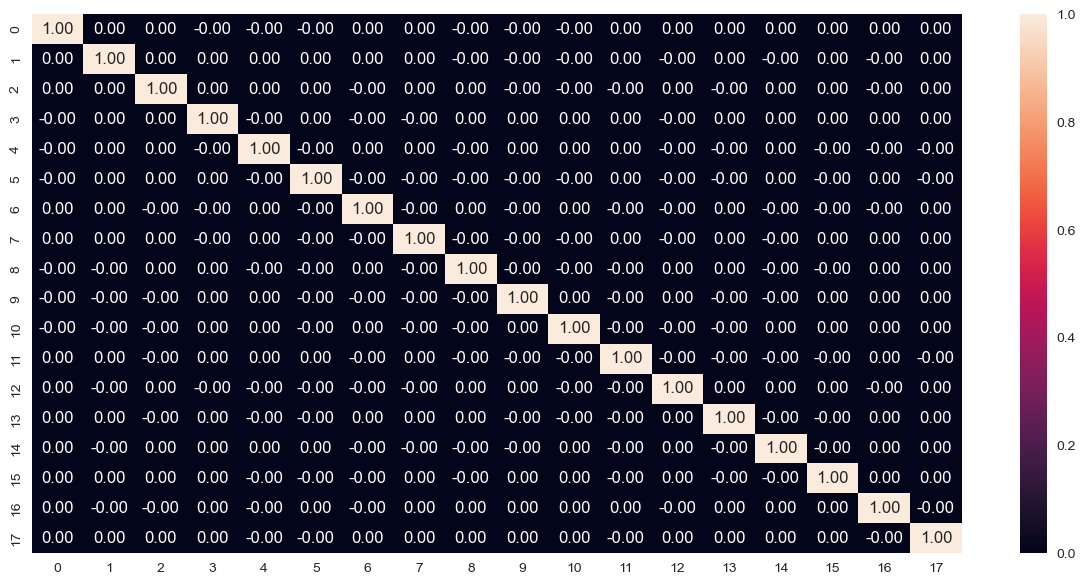

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(loan_pca.corr(),fmt='.2f',annot=True);

In [46]:
loan_db=loan_pca.join(loan["db_labels"])
loan_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,db_labels
0,0.900946,0.268978,4.400426,0.947266,-1.477544,-1.215759,-1.178800,-1.884341,-0.488128,1.256589,1.076424,0.596674,-1.029179,0.775191,-1.280867,0.069859,0.364424,-1.005349,0
1,1.934057,0.955885,-0.421476,-0.994026,0.172520,-0.527845,-1.402845,0.853787,-0.352519,0.265245,0.856150,-0.565471,0.425683,0.309518,-1.410409,0.408776,0.085393,0.762736,0
2,-1.194342,-2.764197,-1.238484,-0.723277,-0.193404,0.607126,-0.466229,0.626095,-2.348896,-0.078693,0.413155,-0.759323,0.379357,-2.049216,-1.399558,-0.227364,1.072348,0.237481,0
3,-3.453692,-1.328371,-1.612549,-1.015255,0.097585,0.994131,0.267539,0.391301,-0.829948,0.285381,0.311563,-0.621127,-0.065365,0.294088,-0.236152,0.629965,-0.447423,0.981419,0
4,-0.142375,2.478797,-0.038484,-1.131219,-2.606971,-1.264206,-1.933799,1.021268,-0.950092,-0.328634,0.460045,-0.534729,0.059360,0.616928,-0.240890,0.145338,0.296525,0.551089,0


In [47]:
loan_K=loan_pca.join(loan["K_labels"])

In [48]:
loan_K.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,K_labels
0,0.900946,0.268978,4.400426,0.947266,-1.477544,-1.215759,-1.178800,-1.884341,-0.488128,1.256589,1.076424,0.596674,-1.029179,0.775191,-1.280867,0.069859,0.364424,-1.005349,3
1,1.934057,0.955885,-0.421476,-0.994026,0.172520,-0.527845,-1.402845,0.853787,-0.352519,0.265245,0.856150,-0.565471,0.425683,0.309518,-1.410409,0.408776,0.085393,0.762736,3
2,-1.194342,-2.764197,-1.238484,-0.723277,-0.193404,0.607126,-0.466229,0.626095,-2.348896,-0.078693,0.413155,-0.759323,0.379357,-2.049216,-1.399558,-0.227364,1.072348,0.237481,1
3,-3.453692,-1.328371,-1.612549,-1.015255,0.097585,0.994131,0.267539,0.391301,-0.829948,0.285381,0.311563,-0.621127,-0.065365,0.294088,-0.236152,0.629965,-0.447423,0.981419,1
4,-0.142375,2.478797,-0.038484,-1.131219,-2.606971,-1.264206,-1.933799,1.021268,-0.950092,-0.328634,0.460045,-0.534729,0.059360,0.616928,-0.240890,0.145338,0.296525,0.551089,2


# Train Test Split

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan_db["db_labels"]=le.fit_transform(loan_db["db_labels"])

In [50]:
loan_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,db_labels
0,0.900946,0.268978,4.400426,0.947266,-1.477544,-1.215759,-1.178800,-1.884341,-0.488128,1.256589,1.076424,0.596674,-1.029179,0.775191,-1.280867,0.069859,0.364424,-1.005349,1
1,1.934057,0.955885,-0.421476,-0.994026,0.172520,-0.527845,-1.402845,0.853787,-0.352519,0.265245,0.856150,-0.565471,0.425683,0.309518,-1.410409,0.408776,0.085393,0.762736,1
2,-1.194342,-2.764197,-1.238484,-0.723277,-0.193404,0.607126,-0.466229,0.626095,-2.348896,-0.078693,0.413155,-0.759323,0.379357,-2.049216,-1.399558,-0.227364,1.072348,0.237481,1
3,-3.453692,-1.328371,-1.612549,-1.015255,0.097585,0.994131,0.267539,0.391301,-0.829948,0.285381,0.311563,-0.621127,-0.065365,0.294088,-0.236152,0.629965,-0.447423,0.981419,1
4,-0.142375,2.478797,-0.038484,-1.131219,-2.606971,-1.264206,-1.933799,1.021268,-0.950092,-0.328634,0.460045,-0.534729,0.059360,0.616928,-0.240890,0.145338,0.296525,0.551089,1


In [51]:
X1=loan_K.drop(['K_labels'],axis=1)
y1=loan_K["K_labels"]
X2=loan_db.drop(['db_labels'],axis=1)
y2=loan_db["db_labels"]

In [52]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=1)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=1)

In [53]:
print("Shape of X_train1",X_train1.shape)
print("Shape of X_train2",X_train2.shape)
print("Shape of y_train1",y_train1.shape)
print("Shape of y_train2",y_train2.shape)

Shape of X_train1 (93722, 18)
Shape of X_train2 (93722, 18)
Shape of y_train1 (93722,)
Shape of y_train2 (93722,)


In [54]:
print("Shape of X_test1",X_test1.shape)
print("Shape of X_test2",X_test2.shape)
print("Shape of y_test1",y_test1.shape)
print("Shape of y_testw",y_test2.shape)

Shape of X_test1 (40167, 18)
Shape of X_test2 (40167, 18)
Shape of y_test1 (40167,)
Shape of y_testw (40167,)


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
score_card = pd.DataFrame(columns=['Model_Name','Train_score','Test_score','Clusters/Labels', 'Cohen_kappa_Score', 'Accuracy'])

score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy


# Model Using Kmean Labels

# Random Forest K_means Target column.

In [57]:
RF_k=RandomForestClassifier(random_state=1).fit(X_train1,y_train1)
y_pred_k=RF_k.predict(X_test1)
print(classification_report(y_test1,y_pred_k))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2339
           1       0.97      0.97      0.97     11241
           2       0.98      0.98      0.98     11921
           3       0.98      0.99      0.98     14666

    accuracy                           0.98     40167
   macro avg       0.98      0.98      0.98     40167
weighted avg       0.98      0.98      0.98     40167



In [58]:
print("Train_score :",RF_k.score(X_train1,y_train1))
print("Test_score :",RF_k.score(X_test1,y_test1))

Train_score : 1.0
Test_score : 0.9784400129459506


In [59]:
Accuracy_score=metrics.accuracy_score(y_test1,y_pred_k)
Train_score=RF_k.score(X_train1,y_train1)
Test_score=RF_k.score(X_test1,y_test1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_k,y_test1)

In [60]:
Classification_model = pd.Series({
                     'Model_Name': "Random forest (Kmeans) All Feature",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'KMeans Clusters / 4',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card


,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.0,0.97844,KMeans Clusters / 4,0.969042,0.97844


# Using Randomized Search CV to tune this model

In [61]:
imp_feat = pd.DataFrame({"Importance":RF_k.feature_importances_,'Feature':X_train1.columns})
imp_feature = imp_feat.sort_values(by='Importance',ascending=False)[:8]['Feature']

In [62]:
imp=list(imp_feature)

In [63]:
X_train_imp=X_train1[imp]
X_test_imp=X_test1[imp]

In [64]:
RF_model_2 = RandomForestClassifier(random_state=1,max_features='auto').fit(X_train_imp,y_train1)

In [65]:
param=[{"max_depth": [2,3,4,5,6],
       "max_features":['auto', 'sqrt', 'log2']}]
grc=RandomizedSearchCV(RF_model_2,param_distributions=param,cv=10,scoring="accuracy")
grc.fit(X_train_imp,y_train1)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_features='auto',
                                                    random_state=1),
                   param_distributions=[{'max_depth': [2, 3, 4, 5, 6],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2']}],
                   scoring='accuracy')

In [66]:
print(grc.best_params_)

{'max_features': 'log2', 'max_depth': 6}


In [67]:
RF_k2=RandomForestClassifier(random_state=1,max_depth= 6,max_features ='log2').fit(X_train_imp,y_train1)
y_pred_k2=RF_k2.predict(X_test_imp)
print(classification_report(y_test1,y_pred_k2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2339
           1       0.92      0.93      0.92     11241
           2       0.95      0.93      0.94     11921
           3       0.93      0.96      0.95     14666

    accuracy                           0.94     40167
   macro avg       0.94      0.92      0.93     40167
weighted avg       0.94      0.94      0.94     40167



In [68]:
print("Train_score :",RF_k2.score(X_train_imp,y_train1))
print("Test_score :",RF_k2.score(X_test_imp,y_test1))

Train_score : 0.9390324576940313
Test_score : 0.9368386984340379


In [69]:
Accuracy_score=metrics.accuracy_score(y_test1,y_pred_k2)
Train_score=RF_k2.score(X_train_imp,y_train1)
Test_score=RF_k2.score(X_test_imp,y_test1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_k2,y_test1)

In [70]:
Classification_model = pd.Series({
                     'Model_Name': "Random forest (Kmeans) with imp feature using grid search CV",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'KMeans Clusters / 4',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839


In [71]:
from xgboost import XGBClassifier

In [72]:
xgb_model = XGBClassifier()
y_pred_xgb = xgb_model.fit(X_train1, y_train1).predict(X_test1)
print(classification_report(y_test1, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2339
           1       0.99      0.99      0.99     11241
           2       0.99      0.99      0.99     11921
           3       0.99      0.99      0.99     14666

    accuracy                           0.99     40167
   macro avg       0.99      0.99      0.99     40167
weighted avg       0.99      0.99      0.99     40167



In [73]:
print("Train_score :",xgb_model.score(X_train1,y_train1))
print("Test_score :",xgb_model.score(X_test1,y_test1))

Train_score : 1.0
Test_score : 0.9901411606542684


In [74]:
Accuracy_score=metrics.accuracy_score(y_test1,y_pred_xgb)
Train_score=xgb_model.score(X_train1,y_train1)
Test_score=xgb_model.score(X_test1,y_test1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb,y_test1)

In [75]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST (Kmeans)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'KMeans Clusters / 4',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141


In [76]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma": [0.5,1,2,3,4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
              
             }
rs_model=RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [77]:
rs_model.fit(X_train1,y_train1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.5, 1, 2, 3, 4],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [None, 3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring='accuracy', verbose=3)

In [78]:
print(rs_model.best_params_)

{'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 1, 'gamma': 2, 'colsample_bytree': 0.5}


In [79]:
xgb_model2=XGBClassifier(n_estimators=50,min_child_weight=5,max_depth=3,learnig_rate=1,gamma=1,colsample_bytree=0.7).fit(X_train1,y_train1)

[01:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learnig_rate" } are not used.



In [80]:
y_pred_xgb2=xgb_model2.predict(X_test1)
print(classification_report(y_test1,y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2339
           1       0.98      0.98      0.98     11241
           2       0.99      0.98      0.98     11921
           3       0.98      0.99      0.98     14666

    accuracy                           0.98     40167
   macro avg       0.98      0.98      0.98     40167
weighted avg       0.98      0.98      0.98     40167



In [81]:
print("Train_score :",xgb_model2.score(X_train1,y_train1))
print("Test_score :",xgb_model2.score(X_test1,y_test1))

Train_score : 0.987356223725486
Test_score : 0.9824233823785695


In [82]:
Accuracy_score=metrics.accuracy_score(y_test1,y_pred_xgb2)
Train_score=xgb_model2.score(X_train1,y_train1)
Test_score=xgb_model2.score(X_test1,y_test1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb2,y_test1)

In [83]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST (Kmeans) using RandomizedSeachCV",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'KMeans Clusters / 4',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141
3,XGBOOST (Kmeans) using RandomizedSeachCV,0.987356,0.982423,KMeans Clusters / 4,0.974771,0.982423


# Model using CBscan labels

# Random Forest Model 1

In [84]:
RF_cb=RandomForestClassifier(random_state=1).fit(X_train2,y_train2)
y_pred_cb=RF_cb.predict(X_test2)
print(classification_report(y_test2,y_pred_cb))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       604
           1       1.00      1.00      1.00     38626
           2       0.93      0.99      0.96       587
           3       0.95      0.96      0.95       121
           4       0.96      0.97      0.97       186
           5       0.73      0.36      0.48        22
           6       0.86      0.57      0.69        21

    accuracy                           0.99     40167
   macro avg       0.90      0.79      0.83     40167
weighted avg       0.99      0.99      0.99     40167



In [85]:
print("Train_score :",RF_cb.score(X_train2,y_train2))
print("Test_score :",RF_cb.score(X_test2,y_test2))

Train_score : 1.0
Test_score : 0.9937261931436253


In [86]:
Accuracy_score=metrics.accuracy_score(y_test2,y_pred_cb)
Train_score=RF_cb.score(X_train2,y_train2)
Test_score=RF_cb.score(X_test2,y_test2)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_cb,y_test2)

In [87]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (DBSCAN)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'DBSCAN Labels / 7',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141
3,XGBOOST (Kmeans) using RandomizedSeachCV,0.987356,0.982423,KMeans Clusters / 4,0.974771,0.982423
4,Random Forest (DBSCAN),1.000000,0.993726,DBSCAN Labels / 7,0.912492,0.993726


# Imp Feature Random Forest model 2

In [88]:
imp_feat = pd.DataFrame({"Importance":RF_cb.feature_importances_,'Feature':X_train2.columns})
imp_feature = imp_feat.sort_values(by='Importance',ascending=False)[:8]['Feature']

In [89]:
imp_feat=list(imp_feature)
X_train_imp=X_train2[imp]
X_test_imp=X_test2[imp]

In [90]:
RF_model_2 = RandomForestClassifier(random_state=1).fit(X_train_imp,y_train2)

In [91]:
param=[{"max_depth": [2,3,4,5,6],
       "max_features":['auto', 'sqrt', 'log2']}]
grc1=RandomizedSearchCV(RF_model_2,param_distributions=param,cv=10,scoring="accuracy")
grc1.fit(X_train_imp,y_train2)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions=[{'max_depth': [2, 3, 4, 5, 6],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2']}],
                   scoring='accuracy')

In [92]:
print(grc1.best_params_)

{'max_features': 'log2', 'max_depth': 6}


In [93]:
RF_cb2 = RandomForestClassifier(random_state=1,max_depth=6,max_features="log2").fit(X_train_imp,y_train2)

In [94]:
y_pred_cb2=RF_cb2.predict(X_test_imp)
print(classification_report(y_test2,y_pred_cb2))

              precision    recall  f1-score   support

           0       0.84      0.33      0.48       604
           1       0.99      1.00      1.00     38626
           2       0.83      0.88      0.85       587
           3       0.87      0.98      0.92       121
           4       0.85      0.97      0.91       186
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        21

    accuracy                           0.99     40167
   macro avg       0.63      0.59      0.59     40167
weighted avg       0.98      0.99      0.98     40167



In [95]:
print("Train_score :",RF_cb2.score(X_train_imp,y_train2))
print("Test_score :",RF_cb2.score(X_test_imp,y_test2))

Train_score : 0.9873455538720898
Test_score : 0.9868050887544502


In [96]:
Accuracy_score=metrics.accuracy_score(y_test2,y_pred_cb2)
Train_score=RF_cb2.score(X_train_imp,y_train2)
Test_score=RF_cb2.score(X_test_imp,y_test2)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_cb2,y_test2)

In [97]:
Classification_model = pd.Series({
                     'Model_Name': "Random forest(DBSCAN) with imp feature using grid search CV",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'DBSCAN / 7',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141
3,XGBOOST (Kmeans) using RandomizedSeachCV,0.987356,0.982423,KMeans Clusters / 4,0.974771,0.982423
4,Random Forest (DBSCAN),1.000000,0.993726,DBSCAN Labels / 7,0.912492,0.993726
5,Random forest(DBSCAN) with imp feature using g...,0.987346,0.986805,DBSCAN / 7,0.803010,0.986805


# XGBOOST DBSCAN

In [98]:
xgb_model = XGBClassifier()
y_pred_x = xgb_model.fit(X_train2, y_train2).predict(X_test2)
print(classification_report(y_test2, y_pred_x))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       604
           1       1.00      1.00      1.00     38626
           2       0.94      0.97      0.95       587
           3       0.96      0.98      0.97       121
           4       0.96      0.98      0.97       186
           5       0.58      0.64      0.61        22
           6       0.79      0.71      0.75        21

    accuracy                           0.99     40167
   macro avg       0.87      0.86      0.86     40167
weighted avg       0.99      0.99      0.99     40167



In [99]:
print("Train_score :",xgb_model.score(X_train2,y_train2))
print("Test_score :",xgb_model.score(X_test2,y_test2))

Train_score : 1.0
Test_score : 0.9942988024995644


In [100]:
Accuracy_score=metrics.accuracy_score(y_test2,y_pred_x)
Train_score=xgb_model.score(X_train2,y_train2)
Test_score=xgb_model.score(X_test2,y_test2)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_x,y_test2)

In [101]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST (DBSCAN) All Features",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'DBSCAN / 7',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141
3,XGBOOST (Kmeans) using RandomizedSeachCV,0.987356,0.982423,KMeans Clusters / 4,0.974771,0.982423
4,Random Forest (DBSCAN),1.000000,0.993726,DBSCAN Labels / 7,0.912492,0.993726
5,Random forest(DBSCAN) with imp feature using g...,0.987346,0.986805,DBSCAN / 7,0.803010,0.986805
6,XGBOOST (DBSCAN) All Features,1.000000,0.994299,DBSCAN / 7,0.921340,0.994299


# XGBOOST with Randomized Search CV

In [102]:
param=[{"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma": [0.5,1,2,3,4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}]
grc1=RandomizedSearchCV(xgb_model,param_distributions=param,cv=10,scoring="accuracy")
grc1.fit(X_train2,y_train2)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   param_distributions=[{'colsample_bytree': [0.3, 0.4, 0.5,
                                                              0.7],
                                         'gamma': [0.5, 1, 2, 3, 4],
                                         'learning_rate': [0.01, 0.1, 1],
                                         'max_depth': [None, 3, 4, 5, 6],
                                         'min_child_weight': [1, 3, 5, 7],
                                         'n_estimators': [40, 50, 80, 100]}],
                   scoring='accuracy')

In [103]:
print(grc1.best_params_)

{'n_estimators': 100, 'min_child_weight': 7, 'max_depth': None, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.5}


In [104]:
xgb_model2.fit(X_train2, y_train2)

[03:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "learnig_rate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learnig_rate=1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [105]:
import joblib

In [106]:
joblib.dump(xgb_model2, "xgb1.joblib.dat")

['xgb1.joblib.dat']

In [107]:
loaded_model = joblib.load("xgb1.joblib.dat")

In [108]:
y_pred_x2 = loaded_model.predict(X_test2)
print(classification_report(y_test2, y_pred_x2)) 

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       604
           1       1.00      1.00      1.00     38626
           2       0.93      0.97      0.95       587
           3       0.94      0.98      0.96       121
           4       0.96      0.97      0.97       186
           5       0.54      0.59      0.57        22
           6       0.72      0.62      0.67        21

    accuracy                           0.99     40167
   macro avg       0.85      0.83      0.84     40167
weighted avg       0.99      0.99      0.99     40167



In [109]:
print("Train_score :",xgb_model2.score(X_train2,y_train2))
print("Test_score :",xgb_model2.score(X_test2,y_test2))

Train_score : 0.99701244104906
Test_score : 0.9938008813204869


In [110]:
Accuracy_score=metrics.accuracy_score(y_test2,y_pred_x2)
Train_score=loaded_model.score(X_train2,y_train2)
Test_score=loaded_model.score(X_test2,y_test2)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_x2,y_test2)

In [111]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST (DBSCAN) Randomized Search CV",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'Clusters/Labels':'DBSCAN / 7',
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,Clusters/Labels,Cohen_kappa_Score,Accuracy
0,Random forest (Kmeans) All Feature,1.000000,0.978440,KMeans Clusters / 4,0.969042,0.978440
1,Random forest (Kmeans) with imp feature using ...,0.939032,0.936839,KMeans Clusters / 4,0.909115,0.936839
2,XGBOOST (Kmeans),1.000000,0.990141,KMeans Clusters / 4,0.985852,0.990141
3,XGBOOST (Kmeans) using RandomizedSeachCV,0.987356,0.982423,KMeans Clusters / 4,0.974771,0.982423
4,Random Forest (DBSCAN),1.000000,0.993726,DBSCAN Labels / 7,0.912492,0.993726
5,Random forest(DBSCAN) with imp feature using g...,0.987346,0.986805,DBSCAN / 7,0.803010,0.986805
6,XGBOOST (DBSCAN) All Features,1.000000,0.994299,DBSCAN / 7,0.921340,0.994299
7,XGBOOST (DBSCAN) Randomized Search CV,0.997012,0.993801,DBSCAN / 7,0.914387,0.993801


In [112]:
loan.head(1)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
0,10000.0,19.53,52000.0,15.0,0.0,1.0,4.0,2.0,35.9,0.0,0.0,0.0,0.0,622.0,15886.0,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,1623.0,39.9,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,3,0


# Summary 

In [113]:
loan[loan["db_labels"]==0].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,128601.00000,128601.000000,1.286010e+05,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,1.286010e+05,128601.000000,128601.0,128601.000000,1.286010e+05,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.0,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.000000,128601.0,128601.000000,128601.000000,128601.000000,128601.000000,128601.0
mean,15624.34915,12.438174,8.029221e+04,19.531493,0.305293,0.570124,12.095738,0.235364,52.169896,4568.396621,1.179802e+00,104.016076,0.0,239.346553,1.469049e+05,1.041802,2.782885,1.624167,21.651535,35530.966337,71.118677,2.920886,60.719934,0.943562,1.543822,2.169812,10929.989113,60.007015,0.0,0.000008,1.666146,6.648665,0.488013,3.818835,8.657911,0.0,0.066189,94.280495,0.130442,2.007348,0.0
std,8853.85832,4.832286,7.816821e+04,9.234374,0.847230,0.871974,5.750942,0.656739,24.193355,5916.492774,9.298298e+00,584.491107,0.0,1998.286075,1.628285e+05,1.202416,2.956059,1.671008,26.789059,41973.391572,21.313527,2.617885,19.829005,1.485650,2.787708,2.454639,15807.234325,27.829467,0.0,0.002789,1.934291,5.604836,1.296165,2.395799,7.454512,0.0,0.441267,8.611068,0.383615,0.905470,0.0
min,1000.00000,5.320000,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.900000e-09,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,8500.00000,8.490000,4.900000e+04,12.660000,0.000000,0.000000,8.000000,0.000000,34.100000,0.000000,0.000000e+00,0.000000,0.0,0.000000,3.216700e+04,0.000000,1.000000,0.000000,7.000000,9554.000000,61.000000,1.000000,48.000000,0.000000,0.000000,0.000000,1720.000000,38.800000,0.0,0.000000,0.000000,2.000000,0.000000,2.000000,4.000000,0.0,0.000000,91.700000,0.000000,1.000000,0.0
50%,14400.00000,11.480000,6.800000e+04,18.780000,0.000000,0.000000,11.000000,0.000000,52.100000,2184.990000,0.000000e+00,0.000000,0.0,0.000000,8.601600e+04,1.000000,2.000000,1.000000,13.000000,24049.000000,74.000000,2.000000,62.000000,0.000000,0.000000,1.000000,5403.000000,62.400000,0.0,0.000000,1.000000,5.000000,0.000000,3.000000,7.000000,0.0,0.000000,98.000000,0.000000,2.000000,0.0
75%,21000.00000,15.310000,9.500000e+04,25.790000,0.000000,1.000000,15.000000,0.000000,70.700000,7592.040000,0.000000e+00,0.000000,0.0,0.000000,2.169450e+05,2.000000,3.000000,2.000000,24.000000,46329.000000,85.000000,4.000000,75.000000,1.000000,2.000000,3.000000,13369.000000,84.400000,0.0,0.000000,3.000000,9.000000,0.000000,5.000000,11.000000,0.0,0.000000,100.000000,0.000000,3.000000,0.0
max,40000.00000,28.990000,9.550000e+06,112.980000,21.000000,5.000000,74.000000,46.000000,165.800000,31060.230000,5.113900e+02,23271.510000,0.0,224107.000000,5.445012e+06,15.000000,39.000000,30.000000,434.000000,796104.000000,181.000000,44.000000,151.000000,28.000000,79.000000,40.000000,282091.000000,165.800000,0.0,1.000000,51.000000,25.000000,38.000000,36.000000,121.000000,0.0,20.000000,100.000000,9.000000,3.000000,0.0


In [114]:
loan[loan["db_labels"]==1].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.0,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.0,1941.0,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.0,1941.000000,1941.000000,1941.000000,1941.000000,1941.0
mean,13521.470891,12.566218,74573.097295,19.310428,0.728490,0.657908,12.251417,0.198867,45.734791,4099.418367,0.0,2.855574,1.102009,1176.703246,1.304034e+05,1.117489,2.897371,1.592285,20.189993,34108.734234,71.208140,3.120520,57.636607,1.059763,1.347244,2.373004,8585.548879,53.592051,0.0,0.0,1.433282,6.357032,0.861927,3.683668,8.836167,0.0,0.421432,91.425090,0.060278,1.399279,1.0
std,8260.158954,4.432026,44984.814171,8.644148,1.241448,0.937987,5.398707,0.602930,22.122418,5236.473065,0.0,58.574706,0.515633,4247.076758,1.453321e+05,1.240471,2.916589,1.539260,25.187352,34302.373878,20.852426,2.508523,19.303046,1.656457,2.600353,2.543634,11548.500290,26.401334,0.0,0.0,1.805291,5.485293,1.571164,2.194860,7.072814,0.0,0.968384,9.067161,0.264719,1.200421,0.0
min,1000.000000,5.320000,10000.000000,0.550000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,2.250000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,32.000000,0.000000,0.000000,1.0
25%,7000.000000,9.160000,46000.000000,12.730000,0.000000,0.000000,8.000000,0.000000,29.700000,0.000000,0.0,0.000000,1.000000,52.000000,2.935200e+04,0.000000,1.000000,1.000000,6.000000,11688.000000,61.000000,1.000000,44.000000,0.000000,0.000000,1.000000,2102.000000,34.000000,0.0,0.0,0.000000,2.000000,0.000000,2.000000,4.000000,0.0,0.000000,87.000000,0.000000,0.000000,1.0
50%,12000.000000,11.990000,65000.000000,18.530000,0.000000,0.000000,11.000000,0.000000,43.800000,2228.320000,0.0,0.000000,1.000000,212.000000,7.041000e+04,1.000000,2.000000,1.000000,12.000000,24782.000000,74.000000,3.000000,58.000000,0.000000,0.000000,2.000000,5064.000000,53.000000,0.0,0.0,1.000000,5.000000,0.000000,3.000000,7.000000,0.0,0.000000,93.700000,0.000000,1.000000,1.0
75%,18000.000000,14.850000,89000.000000,25.200000,1.000000,1.000000,15.000000,0.000000,61.000000,6377.230000,0.0,0.000000,1.000000,772.000000,1.940080e+05,2.000000,3.000000,2.000000,22.000000,45941.000000,85.000000,4.000000,72.000000,2.000000,2.000000,3.000000,10508.000000,75.800000,0.0,0.0,2.000000,9.000000,1.000000,5.000000,12.000000,0.0,1.000000,100.000000,0.000000,3.000000,1.0
max,40000.000000,28.990000,450000.000000,49.380000,22.000000,5.000000,47.000000,9.000000,100.600000,26478.590000,0.0,1858.640000,12.000000,102883.000000,1.126980e+06,9.000000,28.000000,11.000000,297.000000,339530.000000,138.000000,18.000000,115.000000,24.000000,37.000000,27.000000,156021.000000,105.000000,0.0,0.0,12.000000,24.000000,17.000000,16.000000,54.000000,0.0,22.000000,100.000000,3.000000,3.000000,1.0


In [115]:
loan[loan["db_labels"]==2].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,417.00000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.0,417.000000,4.170000e+02,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.0,417.000000,417.000000,417.000000,417.0
mean,16147.36211,13.095060,95066.035420,21.015228,1.700240,0.546763,14.383693,0.088729,41.964578,4862.089736,0.0,0.071942,0.0,42.184652,2.170581e+05,0.923261,2.772182,1.414868,20.878192,37013.369305,63.841727,2.681055,50.707434,0.808153,1.633094,1.860911,18009.682704,48.399366,0.0,571.937650,2.450839,6.815348,0.270983,4.093525,8.143885,0.0,0.0,89.128058,0.009592,1.916067,2.0
std,9053.00492,4.212284,65697.736028,9.404505,1.046434,0.848270,5.836022,0.403462,21.730549,5812.048938,0.0,1.247923,0.0,312.529748,2.037953e+05,1.121838,2.214114,1.260750,21.380025,34635.669627,22.682569,2.315593,18.853707,1.195597,2.792875,1.759543,20202.323716,26.006206,0.0,1227.069824,2.091215,5.465535,0.835480,2.713637,5.518188,0.0,0.0,8.114114,0.097587,0.950787,0.0
min,1000.00000,5.320000,14000.000000,1.330000,1.000000,0.000000,3.000000,0.000000,0.600000,0.000000,0.0,0.000000,0.0,0.000000,2.723000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,51.900000,0.000000,0.000000,2.0
25%,8500.00000,9.800000,58000.000000,14.340000,1.000000,0.000000,11.000000,0.000000,26.200000,0.000000,0.0,0.000000,0.0,0.000000,6.796800e+04,0.000000,1.000000,0.000000,8.000000,13872.000000,51.000000,1.000000,37.000000,0.000000,0.000000,1.000000,4483.000000,29.600000,0.0,56.000000,1.000000,3.000000,0.000000,2.000000,4.000000,0.0,0.0,85.200000,0.000000,1.000000,2.0
50%,15000.00000,12.880000,83000.000000,20.040000,1.000000,0.000000,13.000000,0.000000,39.900000,2913.200000,0.0,0.000000,0.0,0.000000,1.819530e+05,1.000000,2.000000,1.000000,14.000000,28741.000000,69.000000,2.000000,51.000000,0.000000,0.000000,2.000000,11149.000000,44.900000,0.0,137.000000,2.000000,5.000000,0.000000,4.000000,7.000000,0.0,0.0,91.400000,0.000000,2.000000,2.0
75%,23325.00000,15.310000,112000.000000,27.420000,2.000000,1.000000,17.000000,0.000000,55.000000,7947.900000,0.0,0.000000,0.0,0.000000,2.996140e+05,1.000000,4.000000,2.000000,26.000000,51718.000000,79.000000,4.000000,63.000000,1.000000,2.000000,3.000000,23412.000000,65.200000,0.0,491.000000,4.000000,10.000000,0.000000,5.000000,11.000000,0.0,0.0,95.200000,0.000000,3.000000,2.0
max,35000.00000,27.490000,700000.000000,81.260000,7.000000,5.000000,39.000000,4.000000,101.000000,25662.190000,0.0,25.000000,0.0,5473.000000,1.448827e+06,8.000000,18.000000,6.000000,137.000000,215963.000000,116.000000,13.000000,105.000000,7.000000,17.000000,10.000000,154375.000000,124.000000,0.0,13042.000000,13.000000,23.000000,7.000000,18.000000,40.000000,0.0,0.0,100.000000,1.000000,3.000000,2.0


In [116]:
loan[loan["db_labels"]==3].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.00000,651.000000,651.000000,651.000000,651.0,651.000000,651.0,651.000000,6.510000e+02,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.0,651.000000,651.000000,651.000000,651.000000,651.000000,651.0,651.000000,651.000000,651.000000,651.0,651.0
mean,15373.924731,12.405883,86043.686667,19.135069,2.055300,0.589862,11.93702,0.122888,47.781919,4507.392197,0.0,1.536866,0.0,241.950845,1.561617e+05,0.878648,2.674347,1.597542,20.647881,36009.162826,68.612903,2.454685,57.904762,1.153610,1.749616,2.284178,9303.732829,55.356006,1.136713,0.0,2.330261,6.571429,2.170507,3.261137,9.357911,0.0,1.539171,87.102611,0.007680,0.0,3.0
std,8806.683367,4.174081,47508.368231,8.788495,1.808531,0.855294,4.93752,0.943128,23.854736,5735.948554,0.0,28.082154,0.0,1447.403659,1.613107e+05,1.082315,2.300154,1.551454,24.702164,40133.922325,20.385079,2.175886,18.300992,1.612756,2.730508,2.540269,12718.905576,27.903115,0.527450,0.0,2.183855,5.855100,1.966674,2.021274,6.616716,0.0,1.441021,9.680900,0.087368,0.0,0.0
min,1000.000000,5.320000,15126.000000,0.410000,1.000000,0.000000,3.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,6.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,35.000000,0.000000,0.0,3.0
25%,8000.000000,9.170000,57804.000000,12.345000,1.000000,0.000000,8.00000,0.000000,29.800000,0.000000,0.0,0.000000,0.0,0.000000,3.269300e+04,0.000000,1.000000,0.000000,6.000000,11810.500000,58.000000,1.000000,45.500000,0.000000,0.000000,0.500000,1475.000000,33.000000,1.000000,0.0,0.000000,2.000000,1.000000,2.000000,5.000000,0.0,1.000000,81.550000,0.000000,0.0,3.0
50%,14000.000000,11.990000,75000.000000,18.100000,1.000000,0.000000,11.00000,0.000000,46.500000,2230.540000,0.0,0.000000,0.0,0.000000,9.346000e+04,1.000000,2.000000,1.000000,14.000000,24390.000000,74.000000,2.000000,59.000000,1.000000,1.000000,2.000000,4800.000000,58.100000,1.000000,0.0,2.000000,5.000000,1.000000,3.000000,8.000000,0.0,1.000000,90.000000,0.000000,0.0,3.0
75%,21000.000000,14.460000,100000.000000,25.385000,2.000000,1.000000,14.00000,0.000000,66.100000,7337.845000,0.0,0.000000,0.0,0.000000,2.368865e+05,1.000000,3.000000,2.000000,23.500000,46877.500000,82.000000,4.000000,71.000000,2.000000,2.000000,3.000000,11854.500000,79.050000,1.000000,0.0,3.500000,10.000000,3.000000,4.000000,12.000000,0.0,1.000000,94.350000,0.000000,0.0,3.0
max,40000.000000,28.670000,465154.000000,47.760000,14.000000,5.000000,39.00000,22.000000,98.900000,25882.960000,0.0,582.810000,0.0,19243.000000,1.048630e+06,6.000000,22.000000,11.000000,276.000000,446205.000000,133.000000,13.000000,109.000000,12.000000,22.000000,24.000000,101809.000000,104.800000,7.000000,0.0,12.000000,24.000000,14.000000,12.000000,51.000000,0.0,14.000000,100.000000,1.000000,0.0,3.0


In [117]:
loan[loan["db_labels"]==4].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.00000,74.0,74.0,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.0,74.000000,74.0,74.000000,74.0
mean,15866.891892,11.593784,87269.756757,20.914865,0.324324,1.094595,12.135135,0.054054,59.081081,4101.03000,0.0,0.0,0.0,7.256757,214317.067568,1.459459,2.702703,1.513514,15.851351,42072.905405,70.445946,3.554054,63.324324,1.189189,1.513514,2.837838,5805.567568,67.132432,1.067568,0.0,2.554054,5.040541,2.891892,3.783784,8.905405,0.0,0.0,80.952703,0.0,0.189189,4.0
std,8230.055914,3.686128,34892.622359,6.748354,0.742231,1.074855,4.058896,0.227668,19.524005,5377.50357,0.0,0.0,0.0,39.635345,156779.176281,1.472945,1.310963,1.100974,14.368613,32663.334901,17.962016,2.664541,14.186727,1.458801,2.511580,1.894672,5705.214301,21.784845,0.302097,0.0,2.233873,4.761257,2.850463,1.974289,5.409704,0.0,0.0,10.840566,0.0,0.675920,0.0
min,2400.000000,5.320000,33438.000000,4.920000,0.000000,0.000000,5.000000,0.000000,13.500000,0.00000,0.0,0.0,0.0,0.000000,11982.000000,0.000000,1.000000,0.000000,1.000000,5340.000000,19.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,10.500000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,0.0,54.500000,0.0,0.000000,4.0
25%,10000.000000,9.160000,65118.000000,15.492500,0.000000,0.000000,9.000000,0.000000,45.750000,0.00000,0.0,0.0,0.0,0.000000,81307.000000,0.000000,2.000000,1.000000,8.000000,21786.750000,59.750000,2.000000,55.250000,0.000000,0.000000,2.000000,1741.000000,54.525000,1.000000,0.0,1.000000,2.000000,1.000000,2.000000,6.000000,0.0,0.0,72.475000,0.0,0.000000,4.0
50%,15000.000000,11.470000,82000.000000,20.880000,0.000000,1.000000,11.500000,0.000000,59.850000,1488.41500,0.0,0.0,0.0,0.000000,185885.500000,1.000000,2.500000,1.000000,11.500000,34100.500000,73.500000,3.000000,65.500000,1.000000,1.000000,3.000000,4021.500000,71.000000,1.000000,0.0,2.000000,4.000000,2.000000,3.000000,7.500000,0.0,0.0,82.900000,0.0,0.000000,4.0
75%,20000.000000,13.612500,97759.250000,25.787500,0.000000,2.000000,15.000000,0.000000,74.225000,7093.34750,0.0,0.0,0.0,0.000000,303901.750000,2.000000,3.000000,2.000000,21.000000,50961.000000,81.000000,4.750000,72.750000,2.000000,2.000000,4.000000,7864.000000,83.200000,1.000000,0.0,3.000000,6.000000,4.750000,5.000000,10.000000,0.0,0.0,89.000000,0.0,0.000000,4.0
max,35000.000000,21.180000,262000.000000,33.840000,3.000000,4.000000,24.000000,1.000000,97.900000,17367.17000,0.0,0.0,0.0,297.000000,743885.000000,7.000000,7.000000,5.000000,91.000000,219263.000000,109.000000,16.000000,87.000000,6.000000,14.000000,8.000000,24539.000000,100.300000,3.000000,0.0,14.000000,24.000000,13.000000,9.000000,39.000000,0.0,0.0,100.000000,0.0,3.000000,4.0


In [118]:
loan[loan["db_labels"]==5].describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.000000,90.0,90.0,90.0
mean,13581.111111,14.387333,86594.453111,19.823778,2.622222,1.255556,11.244444,0.055556,55.027778,4092.536889,31.302444,0.0,0.0,157.722222,166098.744444,1.666667,3.344444,1.888889,11.200000,43603.700000,75.855556,2.655556,69.222222,1.177778,2.044444,3.444444,3477.308532,64.344716,0.0,0.0,1.688889,3.411111,2.344444,2.911111,11.055556,0.0,1.511111,79.273333,0.0,0.0,5.0
std,7277.572821,4.338377,54124.662777,8.322052,1.875794,1.076418,3.790322,0.313054,23.772716,4689.508412,22.454761,0.0,0.0,1006.183869,153490.045355,1.323937,2.459383,1.472172,12.586956,41535.380583,20.070416,1.949711,15.592261,1.525644,2.767837,2.711238,4057.639994,27.350228,0.0,0.0,1.752330,3.197241,2.188638,1.511339,7.444719,0.0,1.192151,12.740361,0.0,0.0,0.0
min,2400.000000,7.390000,19308.000000,2.990000,1.000000,0.000000,5.000000,0.000000,1.000000,0.000000,15.000000,0.0,0.0,0.000000,10676.000000,0.000000,0.000000,0.000000,1.000000,2542.000000,9.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,1.000000,46.700000,0.0,0.0,5.0
25%,8100.000000,10.780000,55000.000000,14.970000,1.000000,0.000000,8.250000,0.000000,40.550000,0.000000,15.807500,0.0,0.0,0.000000,40625.500000,1.000000,2.000000,1.000000,4.000000,18887.750000,62.000000,1.000000,60.000000,0.000000,0.000000,1.250000,901.250000,47.550000,0.0,0.0,0.000000,1.000000,1.000000,2.000000,7.000000,0.0,1.000000,70.000000,0.0,0.0,5.0
50%,11300.000000,13.670000,73690.000000,19.315000,2.000000,1.000000,11.000000,0.000000,58.150000,2780.510000,23.555000,0.0,0.0,0.000000,108625.000000,1.000000,3.000000,1.000000,6.500000,31136.000000,80.500000,2.000000,67.500000,1.000000,1.000000,3.000000,1948.500000,72.750000,0.0,0.0,1.000000,3.000000,2.000000,3.000000,9.500000,0.0,1.000000,81.150000,0.0,0.0,5.0
75%,19900.000000,18.005000,98525.000000,24.392500,4.000000,2.000000,13.000000,0.000000,72.925000,7989.355000,36.697500,0.0,0.0,0.000000,275810.250000,2.000000,4.000000,2.750000,14.000000,55023.000000,89.750000,4.000000,81.000000,2.000000,3.000000,5.000000,4976.250000,89.000000,0.0,0.0,3.000000,5.000000,3.000000,4.000000,14.000000,0.0,2.000000,90.975000,0.0,0.0,5.0
max,35000.000000,24.990000,300000.000000,48.570000,8.000000,5.000000,26.000000,2.000000,98.000000,17126.350000,125.890000,0.0,0.0,8824.000000,754737.000000,6.000000,12.000000,8.000000,76.000000,273833.000000,122.000000,9.000000,105.000000,7.000000,10.000000,15.000000,20436.000000,101.300000,0.0,0.0,6.000000,15.000000,10.000000,6.000000,43.000000,0.0,8.000000,100.000000,0.0,0.0,5.0


In [119]:
loan[loan["db_labels"]==-1].describe() # noice or outliers 

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,K_labels,db_labels
count,2115.000000,2115.000000,2.115000e+03,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2.115000e+03,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.0
mean,15393.831578,14.558918,9.121853e+04,20.486777,1.421129,0.844044,13.116425,0.557920,45.829828,3320.709133,13.196721,517.456450,0.334279,688.533094,1.633973e+05,1.230776,3.595080,1.761821,23.446108,46787.481936,76.711111,3.494969,61.794945,1.344681,1.595272,2.966903,8086.458363,53.682932,0.253428,1238.353191,1.819858,5.651537,1.461939,3.507801,11.141371,0.057683,0.786761,87.375141,0.268558,0.936643,-1.0
std,9457.048140,4.860424,1.033583e+05,31.425511,1.715003,1.143017,6.848505,0.986583,25.180754,5578.451835,33.375334,1262.300461,0.553079,2355.167450,1.839437e+05,1.396266,4.272977,1.902458,32.744468,57775.594401,33.785234,3.431506,26.378115,2.026052,2.977490,3.077037,13206.104261,30.630768,0.513840,7154.873073,2.102209,5.511671,2.127854,2.642945,10.099194,0.241176,1.231261,11.161364,0.517188,1.263996,0.0
min,1000.000000,5.320000,2.000000e+02,0.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.700000,0.000000,0.000000,-1.0
25%,7500.000000,10.750000,5.100000e+04,10.570000,0.000000,0.000000,8.000000,0.000000,27.450000,0.000000,0.000000,0.000000,0.000000,0.000000,3.567150e+04,0.000000,1.000000,0.000000,6.000000,11782.500000,62.000000,1.000000,44.000000,0.000000,0.000000,1.000000,1376.500000,29.850000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,81.800000,0.000000,0.000000,-1.0
50%,13875.000000,13.670000,7.250000e+04,16.980000,1.000000,0.000000,12.000000,0.000000,43.800000,0.000000,0.000000,0.000000,0.000000,0.000000,9.092700e+04,1.000000,2.000000,1.000000,12.000000,28889.000000,75.000000,3.000000,62.000000,1.000000,0.000000,2.000000,3823.000000,54.000000,0.000000,0.000000,1.000000,4.000000,1.000000,3.000000,8.000000,0.000000,1.000000,90.000000,0.000000,0.000000,-1.0
75%,21000.000000,18.250000,1.050000e+05,24.930000,2.000000,1.000000,16.000000,1.000000,63.850000,4482.545000,15.000000,494.000000,1.000000,373.000000,2.381265e+05,2.000000,4.000000,2.000000,25.000000,58698.000000,91.000000,5.000000,78.000000,2.000000,2.000000,4.000000,9458.500000,80.050000,0.000000,0.000000,3.000000,8.000000,2.000000,5.000000,15.000000,0.000000,1.000000,95.700000,0.000000,2.000000,-1.0
max,40000.000000,28.990000,3.000000e+06,999.000000,15.000000,5.000000,59.000000,12.000000,172.000000,29360.260000,609.810000,17864.090000,5.000000,30300.000000,1.989151e+06,16.000000,48.000000,14.000000,446.000000,537620.000000,558.000000,35.000000,198.000000,20.000000,30.000000,26.000000,148301.000000,189.800000,6.000000,112524.000000,18.000000,24.000000,16.000000,24.000000,110.000000,2.000000,14.000000,100.000000,6.000000,3.000000,-1.0
